In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def seesaw_dynamics(t,y,ks=0.01,kf=0.1):
    #y[0] input w1,2
    #y[1] g1,2:2 (gate with output)
    #y[2] g1:1,2 (gate with input)
    #y[3] output w2,3
    #y[4] g1:1,f (gate with fuel)
    #y[5] fuel w2,f
    #y[6] (gate with threshold)
    
    yprime = np.zeros(len(y))
    yprime[0] = -ks * y[0]*y[1] + ks*y[2]*y[3] -ks * y[0]*y[4] + ks*y[2]*y[5] -kf*y[0]*y[6]
    yprime[1] = -ks * y[0]*y[1] + ks*y[2]*y[3]
    yprime[2] = ks * y[0]*y[1] - ks*y[2]*y[3] + ks * y[0]*y[4] - ks*y[2]*y[5]
    yprime[3] = ks * y[0]*y[1] - ks*y[2]*y[3]
    yprime[4] = -ks * y[0]*y[4] + ks*y[2]*y[5] 
    yprime[5] = ks * y[0]*y[4] - ks*y[2]*y[5] 
    yprime[6] = - kf*y[0]*y[6]
    return yprime

In [22]:
nlen = 3000 #minutes
sol_full = solve_ivp(seesaw_dynamics, [0, nlen], [1, 10, 0, 0,0,10,0.5],
                 dense_output=True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


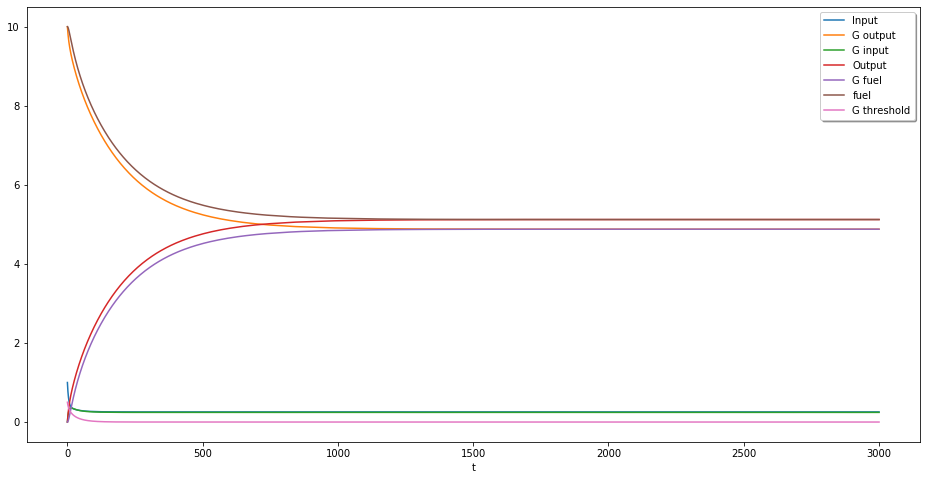

In [23]:
plt.figure(figsize = (16, 8))
t = np.linspace(0, nlen, 20*nlen)
z_full = sol_full.sol(t)
plt.plot(t, z_full.T)
plt.xlabel('t')
plt.legend(['Input','G output', 'G input', 'Output','G fuel','fuel','G threshold'], shadow=True)
plt.show()

In [16]:
my_network = {1:[3],2:[],3:[2]}
len(my_network)

3

In [32]:
def seesaw_network(t,y,network):
    #y structure:
    #y[0:len(network)]: w...
    #y[i*len(network)+j*4] -> gate i->j variables
    yprime = np.zeros(len(y))
    for i in network:
        for j in network[i]:
            
            concs = np.array([y[i-1],y[len(network)*(1+5*(i-1))+(j-1)*5],y[len(network)*(1+5*(i-1))+(j-1)*5+1], y[j-1],y[(1+5*(i-1))*len(network)+(j-1)*5+2],y[(1+5*(i-1))*len(network)+(j-1)*5+3],y[(1+5*(i-1))*len(network)+(j-1)*5+4]])
            print(i,j,concs)
            tempprime = seesaw_dynamics(t,concs)
            print("a",tempprime)
            yprime[i-1] += tempprime[0]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5] += tempprime[1]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5+1] += tempprime[2]
            yprime[j-1] += tempprime[3]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5+2] += tempprime[4]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5+3] += tempprime[5]
            yprime[(1+5*(i-1))*len(network)+(j-1)*5+4] += tempprime[6]
            
    return yprime

In [33]:
nlen = 3000 #minutes
total_length = len(my_network)*(1+ len(my_network)*5)
start = np.zeros(total_length)
start[0] = 1
for i in my_network:
    for j in my_network[i]:
        start[(1+5*(i-1))*len(my_network)+(j-1)*5] = 10
        start[(1+5*(i-1))*len(my_network)+(j-1)*5+3] = 10

sol_full = solve_ivp(seesaw_network, [0, nlen], start,args=[my_network],
                 dense_output=True)

1 3 [ 1. 10.  0.  0.  0. 10.  0.]
a [-0.1 -0.1  0.1  0.1  0.   0.  -0. ]
3 2 [ 0. 10.  0.  0.  0. 10.  0.]
a [ 0.  0.  0.  0.  0.  0. -0.]
1 3 [9.99984193e-01 9.99998419e+00 1.58069614e-05 1.58069614e-05
 0.00000000e+00 1.00000000e+01 0.00000000e+00]
a [-9.99966805e-02 -9.99982612e-02  9.99966805e-02  9.99982612e-02
  1.58069614e-06 -1.58069614e-06 -0.00000000e+00]
3 2 [1.58069614e-05 1.00000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+01 0.00000000e+00]
a [-1.58069614e-06 -1.58069614e-06  1.58069614e-06  1.58069614e-06
  0.00000000e+00  0.00000000e+00 -0.00000000e+00]
1 3 [9.99683861e-01 9.99968386e+00 3.16139229e-04 3.16139229e-04
 0.00000000e+00 1.00000000e+01 0.00000000e+00]
a [-9.99336108e-02 -9.99652247e-02  9.99336108e-02  9.99652247e-02
  3.16139229e-05 -3.16139229e-05 -0.00000000e+00]
3 2 [3.16139229e-04 1.00000000e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+01 0.00000000e+00]
a [-3.16139229e-05 -3.16139229e-05  3.16139229e-05  3.16139229

1 3 [0.62263494 9.46788393 0.37736506 0.40559995 0.15475101 9.84524899
 0.        ]
a [-0.02123077 -0.05741976  0.02123077  0.05741976  0.036189   -0.036189
 -0.        ]
3 2 [0.40559995 9.83646102 0.12651612 0.16353898 0.03702286 9.96297714
 0.        ]
a [-0.02723517 -0.03968978  0.02723517  0.03968978  0.01245461 -0.01245461
 -0.        ]
1 3 [0.59824427 9.44055555 0.40175573 0.43412561 0.15768871 9.84231129
 0.        ]
a [-0.01613477 -0.05473346  0.01613477  0.05473346  0.03859869 -0.03859869
 -0.        ]
3 2 [0.43412561 9.83086022 0.12531884 0.16913978 0.04382094 9.95617906
 0.        ]
a [-0.03017959 -0.04246632  0.03017959  0.04246632  0.01228673 -0.01228673
 -0.        ]
1 3 [0.58960835 9.41743614 0.41039165 0.4473801  0.17217221 9.82782779
 0.        ]
a [-0.01437254 -0.05368998  0.01437254  0.05368998  0.03931744 -0.03931744
 -0.        ]
3 2 [0.4473801  9.81493866 0.13518376 0.18506134 0.04987758 9.95012242
 0.        ]
a [-0.0304321  -0.04365991  0.0304321   0.04365991  0

 -0.        ]
1 3 [0.49396491 6.79123198 0.50603509 1.85138502 2.70273293 7.29726707
 0.        ]
a [-0.00060147 -0.02417765  0.00060147  0.02417765  0.02357618 -0.02357618
 -0.        ]
3 2 [1.85138502 5.34553801 1.357383   4.65446199 3.297079   6.702921
 0.        ]
a [-0.00584493 -0.03578761  0.00584493  0.03578761  0.02994268 -0.02994268
 -0.        ]
1 3 [0.49781171 6.76342896 0.50218829 1.82226646 2.73438275 7.26561725
 0.        ]
a [-0.00164293 -0.02451793  0.00164293  0.02451793  0.022875   -0.022875
 -0.        ]
3 2 [1.82226646 5.26661896 1.41430458 4.73338104 3.31907646 6.68092354
 0.        ]
a [ 0.00497879 -0.02902741 -0.00497879  0.02902741  0.03400619 -0.03400619
 -0.        ]
1 3 [0.49965482 6.72854656 0.50034518 1.82063804 2.77110826 7.22889174
 0.        ]
a [-0.0021866  -0.02451003  0.0021866   0.02451003  0.02232344 -0.02232344
 -0.        ]
3 2 [1.82063804 5.20048429 1.45081541 4.79951571 3.3487003  6.6512997
 0.        ]
a [ 0.01048049 -0.02504988 -0.01048049  0.

1 3 [0.48088748 5.67695003 0.51911252 2.56791138 3.80393745 6.19606255
 0.        ]
a [-9.75152381e-05 -1.39693926e-02  9.75152381e-05  1.39693926e-02
  1.38718774e-02 -1.38718774e-02 -0.00000000e+00]
3 2 [2.56791138 4.22596164 1.75513859 5.77403836 4.01889978 5.98110022
 0.        ]
a [-0.00540176 -0.00717657  0.00540176  0.00717657  0.00177481 -0.00177481
 -0.        ]
1 3 [0.48063913 5.65923178 0.51936087 2.58016641 3.82140736 6.17859264
 0.        ]
a [-7.80944424e-05 -1.38001078e-02  7.80944424e-05  1.38001078e-02
  1.37220133e-02 -1.37220133e-02 -0.00000000e+00]
3 2 [2.58016641 4.21824676 1.76060182 5.78175324 4.02115142 5.97884858
 0.        ]
a [-0.00553281 -0.00704413  0.00553281  0.00704413  0.00151132 -0.00151132
 -0.        ]
1 3 [0.48177994 5.57270429 0.51822006 2.61411081 3.90907566 6.09092434
 0.        ]
a [-0.00057008 -0.01330132  0.00057008  0.01330132  0.01273125 -0.01273125
 -0.        ]
3 2 [2.61411081 4.16587817 1.81318491 5.83412183 4.02093692 5.97906308
 0.     

a [ 3.74945955e-05 -6.98635315e-03 -3.74945955e-05  6.98635315e-03
  7.02384775e-03 -7.02384775e-03 -0.00000000e+00]
3 2 [3.07850135 3.99505859 2.01548117 6.00494141 3.98946024 6.01053976
 0.        ]
a [-0.00363376 -0.00195947  0.00363376  0.00195947 -0.00167429  0.00167429
 -0.        ]
1 3 [0.47315535 4.88778785 0.52684465 3.08724934 4.5853675  5.4146325
 0.        ]
a [-3.10325077e-05 -6.86182206e-03  3.10325077e-05  6.86182206e-03
  6.83078955e-03 -6.83078955e-03 -0.00000000e+00]
3 2 [3.08724934 3.98994571 2.02496281 6.01005429 3.98509148 6.01490852
 0.        ]
a [-0.00270826 -0.00147821  0.00270826  0.00147821 -0.00123005  0.00123005
 -0.        ]
1 3 [0.47300311 4.87903859 0.52699689 3.09397457 4.59396452 5.40603548
 0.        ]
a [-1.28109678e-05 -6.77285465e-03  1.28109678e-05  6.77285465e-03
  6.76004368e-03 -6.76004368e-03 -0.00000000e+00]
3 2 [3.09397457 3.988802   2.02698683 6.011198   3.98421116 6.01578884
 0.        ]
a [-0.00289756 -0.00156633  0.00289756  0.00156633 -

 -0.        ]
3 2 [3.15670043 3.86203216 2.27609212 6.13796784 3.86187572 6.13812428
 0.        ]
a [ 0.03559453  0.01779302 -0.03559453 -0.01779302  0.01780152 -0.01780152
 -0.        ]
1 3 [0.46972457 4.56056554 0.53027543 3.31209581 4.90915903 5.09084097
 0.        ]
a [ 7.70863689e-05 -3.85886645e-03 -7.70863689e-05  3.85886645e-03
  3.93595282e-03 -3.93595282e-03 -0.00000000e+00]
3 2 [3.31209581 3.93642234 2.12733866 6.06357766 3.936239   6.063761
 0.        ]
a [-0.00276052 -0.00138525  0.00276052  0.00138525 -0.00137527  0.00137527
 -0.        ]
1 3 [0.46991746 4.55090957 0.53008254 3.31484417 4.91900789 5.08099211
 0.        ]
a [ 4.06655245e-06 -3.81410848e-03 -4.06655245e-06  3.81410848e-03
  3.81817503e-03 -3.81817503e-03 -0.00000000e+00]
3 2 [3.31484417 3.93295606 2.13424626 6.06704394 3.93279767 6.06720233
 0.        ]
a [-0.00176278 -0.00088571  0.00176278  0.00088571 -0.00087708  0.00087708
 -0.        ]
1 3 [0.46980835 4.54620758 0.53019165 3.31890106 4.92360077 5.07639

1 3 [0.46775309 4.34415489 0.53224691 3.4589023  5.1235982  4.8764018
 0.        ]
a [ 7.86904882e-05 -1.91001825e-03 -7.86904882e-05  1.91001825e-03
  1.98870874e-03 -1.98870874e-03 -0.00000000e+00]
3 2 [3.4589023  3.90152991 2.19694281 6.09847009 3.90152728 6.09847272
 0.        ]
a [-0.00194027 -0.00097021  0.00194027  0.00097021 -0.00097006  0.00097006
 -0.        ]
1 3 [0.46795599 4.33922995 0.53204401 3.45882431 5.12872604 4.87127396
 0.        ]
a [ 1.39210156e-05 -1.90321921e-03 -1.39210156e-05  1.90321921e-03
  1.91714023e-03 -1.91714023e-03 -0.00000000e+00]
3 2 [3.45882431 3.89902826 2.20194574 6.10097174 3.899026   6.100974
 0.        ]
a [-0.00104077 -0.00052045  0.00104077  0.00052045 -0.00052032  0.00052032
 -0.        ]
1 3 [0.46786956 4.33678721 0.53213044 3.46137483 5.13108235 4.86891765
 0.        ]
a [ 3.07419754e-05 -1.87147828e-03 -3.07419754e-05  1.87147828e-03
  1.90222025e-03 -1.90222025e-03 -0.00000000e+00]
3 2 [3.46137483 3.89908208 2.20183796 6.10091792 3.899

1 3 [0.46701109 4.25836506 0.53298891 3.51698014 5.20864603 4.79135397
 0.        ]
a [ 7.05084051e-05 -1.14192265e-03 -7.05084051e-05  1.14192265e-03
  1.21243106e-03 -1.21243106e-03 -0.00000000e+00]
3 2 [3.51698014 3.88767266 2.2246548  6.11232734 3.88767254 6.11232746
 0.        ]
a [-0.00150098 -0.00075049  0.00150098  0.00075049 -0.00075049  0.00075049
 -0.        ]
1 3 [0.46919034 4.25286373 0.53080966 3.48947116 5.21632661 4.78367339
 0.        ]
a [-0.00051388 -0.00143158  0.00051388  0.00143158  0.0009177  -0.0009177
 -0.        ]
3 2 [3.48947116 3.87116748 2.25766511 6.12883252 3.87116741 6.12883259
 0.        ]
a [ 0.00657048  0.00328524 -0.00657048 -0.00328524  0.00328524 -0.00328524
 -0.        ]
1 3 [0.47494339 4.25512681 0.52505661 3.40755337 5.21981658 4.78018342
 0.        ]
a [-0.00201036 -0.00231786  0.00201036  0.00231786  0.0003075  -0.0003075
 -0.        ]
3 2 [3.40755337 3.83134012 2.33731983 6.16865988 3.83134006 6.16865994
 0.        ]
a [ 0.02725271  0.0136263

1 3 [0.47292224 4.19302798 0.52707776 3.46966304 5.27989426 4.72010574
 0.        ]
a [-1.63310587e-03 -1.54193948e-03  1.63310587e-03  1.54193948e-03
 -9.11663861e-05  9.11663861e-05 -0.00000000e+00]
3 2 [3.46966304 3.83134551 2.33730898 6.16865449 3.83134551 6.16865449
 0.        ]
a [ 0.02249147  0.01124574 -0.02249147 -0.01124574  0.01124574 -0.01124574
 -0.        ]
1 3 [0.47506558 4.19357758 0.52493442 3.43882776 5.281488   4.718512
 0.        ]
a [-0.00219209 -0.00187065  0.00219209  0.00187065 -0.00032144  0.00032144
 -0.        ]
3 2 [3.43882776 3.81620267 2.36759466 6.18379733 3.81620267 6.18379733
 0.        ]
a [ 0.03034924  0.01517462 -0.03034924 -0.01517462  0.01517462 -0.01517462
 -0.        ]
1 3 [0.46633271 4.18833936 0.53366729 3.5655404  5.27799335 4.72200665
 0.        ]
a [ 8.33210094e-05 -5.03474007e-04 -8.33210094e-05  5.03474007e-04
  5.86795016e-04 -5.86795016e-04 -0.00000000e+00]
3 2 [3.5655404  3.87693988 2.24612024 6.12306012 3.87693988 6.12306012
 0.       

 0.        ]
a [ 0.00654794  0.00327397 -0.00654794 -0.00327397  0.00327397 -0.00327397
 -0.        ]
1 3 [0.47367213 4.16643031 0.52632787 3.47336321 5.30724181 4.69275819
 0.        ]
a [-0.00189357 -0.00145394  0.00189357  0.00145394 -0.00043963  0.00043963
 -0.        ]
3 2 [3.47336321 3.81989676 2.36020648 6.18010324 3.81989676 6.18010324
 0.        ]
a [ 0.02636862  0.01318431 -0.02636862 -0.01318431  0.01318431 -0.01318431
 -0.        ]
1 3 [0.47606764 4.16746457 0.52393236 3.4384651  5.30860307 4.69139693
 0.        ]
a [-0.00251751 -0.00182472  0.00251751  0.00182472 -0.00069279  0.00069279
 -0.        ]
3 2 [3.4384651  3.80296483 2.39407033 6.19703517 3.80296483 6.19703517
 0.        ]
a [ 0.03519552  0.01759776 -0.03519552 -0.01759776  0.01759776 -0.01759776
 -0.        ]
1 3 [0.4660525  4.16143997 0.5339475  3.58452964 5.30461253 4.69538747
 0.        ]
a [ 9.36353080e-05 -2.54988925e-04 -9.36353080e-05  2.54988925e-04
  3.48624233e-04 -3.48624233e-04 -0.00000000e+00]
3 2 [

3 2 [3.56253308 3.85244415 2.29511169 6.14755585 3.85244415 6.14755585
 0.        ]
a [ 0.00769735  0.00384868 -0.00769735 -0.00384868  0.00384868 -0.00384868
 -0.        ]
1 3 [0.47485316 4.14612285 0.52514684 3.46754122 5.3287303  4.6712697
 0.        ]
a [-0.00225093 -0.00147831  0.00225093  0.00147831 -0.00077262  0.00077262
 -0.        ]
3 2 [3.46754122 3.80683204 2.38633593 6.19316796 3.80683204 6.19316796
 0.        ]
a [ 0.03157264  0.01578632 -0.03157264 -0.01578632  0.01578632 -0.01578632
 -0.        ]
1 3 [0.47856915 4.14815908 0.52143085 3.41296259 5.33041007 4.66958993
 0.        ]
a [-0.00321659 -0.00205557  0.00321659  0.00205557 -0.00116102  0.00116102
 -0.        ]
3 2 [3.41296259 3.78056084 2.43887833 6.21943916 3.78056084 6.21943916
 0.        ]
a [ 0.04531085  0.02265543 -0.04531085 -0.02265543  0.02265543 -0.02265543
 -0.        ]
1 3 [0.4655139  4.14030195 0.5344861  3.60409957 5.32521196 4.67478804
 0.        ]
a [ 1.86219822e-04 -1.02701749e-05 -1.86219822e-04  

1 3 [0.46548968 4.13530346 0.53451032 3.60723332 5.33018622 4.66981378
 0.        ]
a [ 1.80793204e-04  3.16234912e-05 -1.80793204e-04 -3.16234912e-05
  1.49169713e-04 -1.49169713e-04 -0.00000000e+00]
3 2 [3.60723332 3.87126839 2.25746322 6.12873161 3.87126839 6.12873161
 0.        ]
a [-0.00258364 -0.00129182  0.00258364  0.00129182 -0.00129182  0.00129182
 -0.        ]
1 3 [0.46596871 4.13538725 0.53403129 3.60030395 5.33058146 4.66941854
 0.        ]
a [ 5.44537562e-05 -4.28608421e-05 -5.44537562e-05  4.28608421e-05
  9.73145984e-05 -9.73145984e-05 -0.00000000e+00]
3 2 [3.60030395 3.8678456  2.26430881 6.1321544  3.8678456  6.1321544
 0.        ]
a [-0.00080657 -0.00040329  0.00080657  0.00040329 -0.00040329  0.00040329
 -0.        ]
1 3 [0.46583163 4.13520712 0.53416837 3.60235835 5.33062451 4.66937549
 0.        ]
a [ 9.01478948e-05 -2.04439145e-05 -9.01478948e-05  2.04439145e-05
  1.10591809e-04 -1.10591809e-04 -0.00000000e+00]
3 2 [3.60235835 3.86878274 2.26243453 6.13121726 3.8

 0.        ]
a [ 0.00756397  0.00378199 -0.00756397 -0.00378199  0.00378199 -0.00378199
 -0.        ]
1 3 [0.47457461 4.13770609 0.52542539 3.47604422 5.33686852 4.66313148
 0.        ]
a [-0.00219863 -0.00137248  0.00219863  0.00137248 -0.00082615  0.00082615
 -0.        ]
3 2 [3.47604422 3.80687515 2.3862497  6.19312485 3.80687515 6.19312485
 0.        ]
a [ 0.03090952  0.01545476 -0.03090952 -0.01545476  0.01545476 -0.01545476
 -0.        ]
1 3 [0.47816672 4.13978446 0.52183328 3.4231653  5.33838226 4.66161774
 0.        ]
a [-0.00313235 -0.00193186  0.00313235  0.00193186 -0.00120049  0.00120049
 -0.        ]
3 2 [3.4231653  3.78147488 2.43705024 6.21852512 3.78147488 6.21852512
 0.        ]
a [ 0.04420489  0.02210245 -0.04420489 -0.02210245  0.02210245 -0.02210245
 -0.        ]
1 3 [0.46546916 4.13213626 0.53453084 3.60929496 5.3333329  4.6666671
 0.        ]
a [ 1.78728958e-04  5.89743704e-05 -1.78728958e-04 -5.89743704e-05
  1.19754587e-04 -1.19754587e-04 -0.00000000e+00]
3 2 [3

 -0.        ]
3 2 [3.5166266  3.82556599 2.34886802 6.17443401 3.82556599 6.17443401
 0.        ]
a [ 0.02099687  0.01049843 -0.02099687 -0.01049843  0.01049843 -0.01049843
 -0.        ]
1 3 [0.47409739 4.13579893 0.52590261 3.48377131 5.33829846 4.66170154
 0.        ]
a [-0.00207919 -0.00128647  0.00207919  0.00128647 -0.00079272  0.00079272
 -0.        ]
3 2 [3.48377131 3.80978512 2.38042976 6.19021488 3.80978512 6.19021488
 0.        ]
a [ 0.02925903  0.01462952 -0.02925903 -0.01462952  0.01462952 -0.01462952
 -0.        ]
1 3 [0.46574617 4.13076593 0.53425383 3.60603216 5.33498024 4.66501976
 0.        ]
a [ 1.02061066e-04  2.64806837e-05 -1.02061066e-04 -2.64806837e-05
  7.55803827e-05 -7.55803827e-05 -0.00000000e+00]
3 2 [3.60603216 3.86839904 2.26320192 6.13160096 3.86839904 6.13160096
 0.        ]
a [-0.00145041 -0.0007252   0.00145041  0.0007252  -0.0007252   0.0007252
 -0.        ]
1 3 [0.46602767 4.13083897 0.53397233 3.60195865 5.33518871 4.66481129
 0.        ]
a [ 2.7955

  3.56881831e-05 -3.56881831e-05 -0.00000000e+00]
3 2 [3.60388482 3.86650336 2.26699328 6.13349664 3.86650336 6.13349664
 0.        ]
a [-0.00059674 -0.00029837  0.00059674  0.00029837 -0.00029837  0.00029837
 -0.        ]
1 3 [0.46775393 4.13007815 0.53224607 3.57771286 5.33767578 4.66232422
 0.        ]
a [-0.00042852 -0.00027637  0.00042852  0.00027637 -0.00015215  0.00015215
 -0.        ]
3 2 [3.57771286 3.8538955  2.29220899 6.1461045  3.8538955  6.1461045
 0.        ]
a [ 0.00600049  0.00300024 -0.00600049 -0.00300024  0.00300024 -0.00300024
 -0.        ]
1 3 [0.47277398 4.13308482 0.52722602 3.50432131 5.33968916 4.66031084
 0.        ]
a [-0.00173875 -0.00106446  0.00173875  0.00106446 -0.00067429  0.00067429
 -0.        ]
3 2 [3.50432131 3.81870307 2.36259387 6.18129693 3.81870307 6.18129693
 0.        ]
a [ 0.02443863  0.01221932 -0.02443863 -0.01221932  0.01221932 -0.01221932
 -0.        ]
1 3 [0.4755639  4.13473349 0.5244361  3.46329229 5.34083041 4.65916959
 0.        ]
a 

1 3 [0.46587306 4.12779183 0.53412694 3.60587419 5.33808123 4.66191877
 0.        ]
a [ 6.15579847e-05  2.96757646e-05 -6.15579847e-05 -2.96757646e-05
  3.18822202e-05 -3.18822202e-05 -0.00000000e+00]
3 2 [3.60587419 3.86683301 2.26633398 6.13316699 3.86683301 6.13316699
 0.        ]
a [-0.00087017 -0.00043509  0.00087017  0.00043509 -0.00043509  0.00043509
 -0.        ]
1 3 [0.46752328 4.12874546 0.53247672 3.58174232 5.33877782 4.66122218
 0.        ]
a [-0.00037101 -0.0002309   0.00037101  0.0002309  -0.00014011  0.00014011
 -0.        ]
3 2 [3.58174232 3.85524389 2.28951222 6.14475611 3.85524389 6.14475611
 0.        ]
a [ 0.00520008  0.00260004 -0.00520008 -0.00260004  0.00260004 -0.00260004
 -0.        ]
1 3 [0.47174749 4.13128753 0.52825251 3.51994365 5.34045995 4.65954005
 0.        ]
a [-0.0014744  -0.00089505  0.0014744   0.00089505 -0.00057935  0.00057935
 -0.        ]
3 2 [3.51994365 3.82561559 2.34876882 6.17438441 3.82561559 6.17438441
 0.        ]
a [ 0.02072501  0.01036

a [ 4.67991098e-05  2.53331249e-05 -4.67991098e-05 -2.53331249e-05
  2.14659850e-05 -2.14659850e-05 -0.00000000e+00]
3 2 [3.60539992 3.86636004 2.26727991 6.13363996 3.86636004 6.13363996
 0.        ]
a [-0.00066191 -0.00033096  0.00066191  0.00033096 -0.00033096  0.00033096
 -0.        ]
1 3 [0.46586792 4.12728241 0.53413208 3.60623241 5.33858551 4.66141449
 0.        ]
a [ 6.17119643e-05  3.43593083e-05 -6.17119643e-05 -3.43593083e-05
  2.73526560e-05 -2.73526560e-05 -0.00000000e+00]
3 2 [3.60623241 3.86675741 2.26648518 6.13324259 3.86675741 6.13324259
 0.        ]
a [-0.00087045 -0.00043523  0.00087045  0.00043523 -0.00043523  0.00043523
 -0.        ]
1 3 [0.46757867 4.12829852 0.53242133 3.5811974  5.33928014 4.66071986
 0.        ]
a [-0.00038665 -0.00023598  0.00038665  0.00023598 -0.00015067  0.00015067
 -0.        ]
3 2 [3.5811974  3.85474796 2.29050407 6.14525204 3.85474796 6.14525204
 0.        ]
a [ 0.00542223  0.00271111 -0.00542223 -0.00271111  0.00271111 -0.00271111
 -0.

1 3 [0.46586577 4.12715699 0.53413423 3.60633355 5.33870878 4.66129122
 0.        ]
a [ 6.19852865e-05  3.56501926e-05 -6.19852865e-05 -3.56501926e-05
  2.63350939e-05 -2.63350939e-05 -0.00000000e+00]
3 2 [3.60633355 3.86674527 2.26650947 6.13325473 3.86674527 6.13325473
 0.        ]
a [-0.00087387 -0.00043693  0.00087387  0.00043693 -0.00043693  0.00043693
 -0.        ]
1 3 [0.4676045  4.12819644 0.5323955  3.58088428 5.33940806 4.66059194
 0.        ]
a [-0.0003937  -0.00023917  0.0003937   0.00023917 -0.00015453  0.00015453
 -0.        ]
3 2 [3.58088428 3.85454036 2.29091929 6.14545964 3.85454036 6.14545964
 0.        ]
a [ 0.00552178  0.00276089 -0.00552178 -0.00276089  0.00276089 -0.00276089
 -0.        ]
1 3 [0.4720954  4.13090523 0.5279046  3.51516954 5.34119017 4.65880983
 0.        ]
a [-0.00156651 -0.00094507  0.00156651  0.00094507 -0.00062144  0.00062144
 -0.        ]
3 2 [3.51516954 3.82303738 2.35392523 6.17696262 3.82303738 6.17696262
 0.        ]
a [ 0.02202967  0.01101

1 3 [0.46597814 4.12711617 0.53402186 3.60473927 5.33886197 4.66113803
 0.        ]
a [ 3.22027995e-05  1.86365083e-05 -3.22027995e-05 -1.86365083e-05
  1.35662912e-05 -1.35662912e-05 -0.00000000e+00]
3 2 [3.60473927 3.86592772 2.26814456 6.13407228 3.86592772 6.13407228
 0.        ]
a [-0.00045398 -0.00022699  0.00045398  0.00022699 -0.00022699  0.00022699
 -0.        ]
1 3 [0.46592518 4.12708322 0.53407482 3.60551292 5.33884196 4.66115804
 0.        ]
a [ 4.60788535e-05  2.70166044e-05 -4.60788535e-05 -2.70166044e-05
  1.90622491e-05 -1.90622491e-05 -0.00000000e+00]
3 2 [3.60551292 3.86629807 2.26740385 6.13370193 3.86629807 6.13370193
 0.        ]
a [-0.00064817 -0.00032408  0.00064817  0.00032408 -0.00032408  0.00032408
 -0.        ]
1 3 [0.46740704 4.12797283 0.53259296 3.58383813 5.33943421 4.66056579
 0.        ]
a [-0.00034221 -0.00020717  0.00034221  0.00020717 -0.00013505  0.00013505
 -0.        ]
3 2 [3.58383813 3.85590548 2.28818904 6.14409452 3.85590548 6.14409452
 0.     

3 2 [3.6062184  3.86661194 2.26677613 6.13338806 3.86661194 6.13338806
 0.        ]
a [-0.00081659 -0.00040829  0.00081659  0.00040829 -0.00040829  0.00040829
 -0.        ]
1 3 [0.46747206 4.12796498 0.53252794 3.58290982 5.33950707 4.66049293
 0.        ]
a [-0.00035936 -0.00021709  0.00035936  0.00021709 -0.00014228  0.00014228
 -0.        ]
3 2 [3.58290982 3.8554374  2.2891252  6.1445626  3.8554374  6.1445626
 0.        ]
a [ 0.00503977  0.00251989 -0.00503977 -0.00251989  0.00251989 -0.00251989
 -0.        ]
1 3 [0.47156825 4.13043686 0.52843175 3.52298357 5.34113139 4.65886861
 0.        ]
a [-0.0014294  -0.00086127  0.0014294   0.00086127 -0.00056814  0.00056814
 -0.        ]
3 2 [3.52298357 3.82671021 2.34657957 6.17328979 3.82671021 6.17328979
 0.        ]
a [ 0.02009357  0.01004678 -0.02009357 -0.01004678  0.01004678 -0.01004678
 -0.        ]
1 3 [0.473426   4.13155283 0.526574   3.49566602 5.34187317 4.65812683
 0.        ]
a [-0.00191391 -0.00115258  0.00191391  0.00115258 -

1 3 [0.47331782 4.13146524 0.52668218 3.49730478 5.34185258 4.65814742
 0.        ]
a [-0.00188559 -0.00113528  0.00188559  0.00113528 -0.00075031  0.00075031
 -0.        ]
3 2 [3.49730478 3.81438501 2.37122998 6.18561499 3.81438501 6.18561499
 0.        ]
a [ 0.02654898  0.01327449 -0.02654898 -0.01327449  0.01327449 -0.01327449
 -0.        ]
1 3 [0.46574182 4.12689735 0.53425818 3.6082502  5.33884448 4.66115552
 0.        ]
a [ 9.40575392e-05  5.66847212e-05 -9.40575392e-05 -5.66847212e-05
  3.73728180e-05 -3.73728180e-05 -0.00000000e+00]
3 2 [3.6082502  3.86757378 2.26485245 6.13242622 3.86757378 6.13242622
 0.        ]
a [-0.00132267 -0.00066133  0.00132267  0.00066133 -0.00066133  0.00066133
 -0.        ]
1 3 [0.46600724 4.1270573  0.53399276 3.60435796 5.33894993 4.66105007
 0.        ]
a [ 2.44022245e-05  1.46250931e-05 -2.44022245e-05 -1.46250931e-05
  9.77713146e-06 -9.77713146e-06 -0.00000000e+00]
3 2 [3.60435796 3.86570763 2.26858474 6.13429237 3.86570763 6.13429237
 0.     

a [-0.00344941 -0.00207253  0.00344941  0.00207253 -0.00137688  0.00137688
 -0.        ]
3 2 [3.40893514 3.77201671 2.45596658 6.22798329 3.77201671 6.22798329
 0.        ]
a [ 0.04874317  0.02437159 -0.04874317 -0.02437159  0.02437159 -0.02437159
 -0.        ]
1 3 [0.48462275 4.13825375 0.51537725 3.33063522 5.346369   4.653631
 0.        ]
a [-0.00481555 -0.00288958  0.00481555  0.00288958 -0.00192596  0.00192596
 -0.        ]
3 2 [3.33063522 3.73444448 2.53111103 6.26555552 3.73444448 6.26555552
 0.        ]
a [ 0.06841489  0.03420744 -0.06841489 -0.03420744  0.03420744 -0.03420744
 -0.        ]
1 3 [0.46515799 4.12652697 0.53484201 3.61698175 5.33863102 4.66136898
 0.        ]
a [ 2.48158976e-04  1.50268033e-04 -2.48158976e-04 -1.50268033e-04
  9.78909425e-05 -9.78909425e-05 -0.00000000e+00]
3 2 [3.61698175 3.87175436 2.25649128 6.12824564 3.87175436 6.12824564
 0.        ]
a [-0.00351464 -0.00175732  0.00351464  0.00175732 -0.00175732  0.00175732
 -0.        ]
1 3 [0.46583276 4.12

3 2 [3.5562758  3.84264963 2.31470074 6.15735037 3.84264963 6.15735037
 0.        ]
a [ 0.01173803  0.00586902 -0.01173803 -0.00586902  0.00586902 -0.00586902
 -0.        ]
1 3 [0.47900548 4.13488842 0.52099452 3.41391116 5.34411705 4.65588295
 0.        ]
a [-0.00336177 -0.00202005  0.00336177  0.00202005 -0.00134172  0.00134172
 -0.        ]
3 2 [3.41391116 3.77439979 2.45120041 6.22560021 3.77439979 6.22560021
 0.        ]
a [ 0.04749456  0.02374728 -0.04749456 -0.02374728  0.02374728 -0.02374728
 -0.        ]
1 3 [0.4841357  4.137956   0.5158643  3.33784005 5.3461797  4.6538203
 0.        ]
a [-0.00468996 -0.0028146   0.00468996  0.0028146  -0.00187537  0.00187537
 -0.        ]
3 2 [3.33784005 3.73789803 2.52420394 6.26210197 3.73789803 6.26210197
 0.        ]
a [ 0.06660633  0.03330317 -0.06660633 -0.03330317  0.03330317 -0.03330317
 -0.        ]
1 3 [0.46518687 4.12653949 0.53481313 3.61654886 5.33864739 4.66135261
 0.        ]
a [ 2.40497282e-04  1.45658225e-04 -2.40497282e-04 -

1 3 [0.46829369 4.12841799 0.53170631 3.57088211 5.33987571 4.66012429
 0.        ]
a [-0.00057464 -0.00034652  0.00057464  0.00034652 -0.00022813  0.00022813
 -0.        ]
3 2 [3.57088211 3.84965005 2.3006999  6.15034995 3.84965005 6.15034995
 0.        ]
a [ 0.00806926  0.00403463 -0.00806926 -0.00403463  0.00403463 -0.00403463
 -0.        ]
1 3 [0.47484987 4.13237649 0.52515013 3.47483249 5.34247338 4.65752662
 0.        ]
a [-0.00228422 -0.0013745   0.00228422  0.0013745  -0.00090972  0.00090972
 -0.        ]
3 2 [3.47483249 3.80360449 2.39279101 6.19639551 3.80360449 6.19639551
 0.        ]
a [ 0.03219582  0.01609791 -0.03219582 -0.01609791  0.01609791 -0.01609791
 -0.        ]
1 3 [0.47785103 4.13417604 0.52214897 3.43051005 5.34367499 4.65632501
 0.        ]
a [-0.00306468 -0.00184283  0.00306468  0.00184283 -0.00122185  0.00122185
 -0.        ]
3 2 [3.43051005 3.78234304 2.43531391 6.21765696 3.78234304 6.21765696
 0.        ]
a [ 0.04333161  0.02166581 -0.04333161 -0.02166581 

3 2 [3.6068579  3.86689269 2.26621462 6.13310731 3.86689269 6.13310731
 0.        ]
a [-0.0009679  -0.00048395  0.0009679   0.00048395 -0.00048395  0.00048395
 -0.        ]
1 3 [0.46880468 4.12871955 0.53119532 3.56341599 5.34008513 4.65991487
 0.        ]
a [-0.00070825 -0.00042693  0.00070825  0.00042693 -0.00028132  0.00028132
 -0.        ]
3 2 [3.56341599 3.84606777 2.30786446 6.15393223 3.84606777 6.15393223
 0.        ]
a [ 0.00994604  0.00497302 -0.00994604 -0.00497302  0.00497302 -0.00497302
 -0.        ]
1 3 [0.47711257 4.13373392 0.52288743 3.4417651  5.34337865 4.65662135
 0.        ]
a [-0.00287105 -0.00172601  0.00287105  0.00172601 -0.00114504  0.00114504
 -0.        ]
3 2 [3.4417651  3.78774951 2.42450098 6.21225049 3.78774951 6.21225049
 0.        ]
a [ 0.04050127  0.02025063 -0.04050127 -0.02025063  0.02025063 -0.02025063
 -0.        ]
1 3 [0.48173078 4.13649933 0.51826922 3.37345964 5.34523145 4.65476855
 0.        ]
a [-0.00406858 -0.00244319  0.00406858  0.00244319 

  9.84575348e-05 -9.84575348e-05 -0.00000000e+00]
3 2 [3.61709912 3.87180201 2.25639599 6.12819799 3.87180201 6.12819799
 0.        ]
a [-0.003541  -0.0017705  0.003541   0.0017705 -0.0017705  0.0017705
 -0.       ]
1 3 [0.46581451 4.12691007 0.53418549 3.60725481 5.33890444 4.66109556
 0.        ]
a [ 7.51907876e-05  4.56860015e-05 -7.51907876e-05 -4.56860015e-05
  2.95047862e-05 -2.95047862e-05 -0.00000000e+00]
3 2 [3.60725481 3.86708244 2.26583512 6.13291756 3.86708244 6.13291756
 0.        ]
a [-0.00106743 -0.00053372  0.00106743  0.00053372 -0.00053372  0.00053372
 -0.        ]
1 3 [0.4657283  4.12685822 0.5342717  3.60851068 5.33887009 4.66112991
 0.        ]
a [ 9.77731756e-05  5.93044325e-05 -9.77731756e-05 -5.93044325e-05
  3.84687430e-05 -3.84687430e-05 -0.00000000e+00]
3 2 [3.60851068 3.86768445 2.26463111 6.13231555 3.86768445 6.13231555
 0.        ]
a [-0.00138296 -0.00069148  0.00138296  0.00069148 -0.00069148  0.00069148
 -0.        ]
1 3 [0.46835972 4.12844902 0.5316402

 0.        ]
a [-0.00171792 -0.00085896  0.00171792  0.00085896 -0.00085896  0.00085896
 -0.        ]
1 3 [0.46592208 4.12697542 0.53407792 3.60563185 5.33894665 4.66105335
 0.        ]
a [ 4.67200101e-05  2.83941306e-05 -4.67200101e-05 -2.83941306e-05
  1.83258795e-05 -1.83258795e-05 -0.00000000e+00]
3 2 [3.60563185 3.86630364 2.26739273 6.13369636 3.86630364 6.13369636
 0.        ]
a [-0.00065938 -0.00032969  0.00065938  0.00032969 -0.00032969  0.00032969
 -0.        ]
1 3 [0.46586627 4.12694192 0.53413373 3.60644575 5.33892435 4.66107565
 0.        ]
a [ 6.13428383e-05  3.72130627e-05 -6.13428383e-05 -3.72130627e-05
  2.41297757e-05 -2.41297757e-05 -0.00000000e+00]
3 2 [3.60644575 3.86669383 2.26661233 6.13330617 3.86669383 6.13330617
 0.        ]
a [-0.00086388 -0.00043194  0.00086388  0.00043194 -0.00043194  0.00043194
 -0.        ]
1 3 [0.4675519  4.12796056 0.5324481  3.58176792 5.33959134 4.66040866
 0.        ]
a [-0.00038041 -0.0002293   0.00038041  0.0002293  -0.0001511   0.

1 3 [0.46925002 4.12898921 0.53074998 3.5568707  5.34026081 4.65973919
 0.        ]
a [-0.0008248  -0.00049719  0.0008248   0.00049719 -0.00032761  0.00032761
 -0.        ]
3 2 [3.5568707  3.84292996 2.31414008 6.15707004 3.84292996 6.15707004
 0.        ]
a [ 0.01159035  0.00579518 -0.01159035 -0.00579518  0.00579518 -0.00579518
 -0.        ]
1 3 [0.4788405  4.13477894 0.5211595  3.41633816 5.34406156 4.65593844
 0.        ]
a [-0.00331909 -0.00199443  0.00331909  0.00199443 -0.00132467  0.00132467
 -0.        ]
3 2 [3.41633816 3.77555855 2.4488829  6.22444145 3.77555855 6.22444145
 0.        ]
a [ 0.04688687  0.02344343 -0.04688687 -0.02344343  0.02344343 -0.02344343
 -0.        ]
1 3 [0.48389659 4.13780266 0.51610341 3.34137964 5.34609392 4.65390608
 0.        ]
a [-0.00462831 -0.00277771  0.00462831  0.00277771 -0.0018506   0.0018506
 -0.        ]
3 2 [3.34137964 3.73959115 2.5208177  6.26040885 3.73959115 6.26040885
 0.        ]
a [ 0.06571911  0.03285956 -0.06571911 -0.03285956  

1 3 [0.46566302 4.12681912 0.53433698 3.60949434 5.33884391 4.66115609
 0.        ]
a [ 1.15050923e-04  6.97923006e-05 -1.15050923e-04 -6.97923006e-05
  4.52586223e-05 -4.52586223e-05 -0.00000000e+00]
3 2 [3.60949434 3.86815673 2.26368654 6.13184327 3.86815673 6.13184327
 0.        ]
a [-0.00163037 -0.00081519  0.00163037  0.00081519 -0.00081519  0.00081519
 -0.        ]
1 3 [0.46894028 4.1288007  0.53105972 3.56139174 5.34013958 4.65986042
 0.        ]
a [-0.00074392 -0.00044849  0.00074392  0.00044849 -0.00029542  0.00029542
 -0.        ]
3 2 [3.56139174 3.84509622 2.30980756 6.15490378 3.84509622 6.15490378
 0.        ]
a [ 0.01045499  0.00522749 -0.01045499 -0.00522749  0.00522749 -0.00522749
 -0.        ]
1 3 [0.47742905 4.13392736 0.52257095 3.43691929 5.34350169 4.65649831
 0.        ]
a [-0.00295415 -0.00177623  0.00295415  0.00177623 -0.00117792  0.00117792
 -0.        ]
3 2 [3.43691929 3.78542333 2.42915335 6.21457667 3.78542333 6.21457667
 0.        ]
a [ 0.0417193   0.02085

 -0.        ]
1 3 [0.47937436 4.13510118 0.52062564 3.40837574 5.34427318 4.65572682
 0.        ]
a [-0.0034579  -0.00207774  0.0034579   0.00207774 -0.00138017  0.00138017
 -0.        ]
3 2 [3.40837574 3.77173846 2.45652308 6.22826154 3.77173846 6.22826154
 0.        ]
a [ 0.04888733  0.02444366 -0.04888733 -0.02444366  0.02444366 -0.02444366
 -0.        ]
1 3 [0.48421143 4.13799253 0.51578857 3.3365685  5.3462189  4.6537811
 0.        ]
a [-0.00471033 -0.00282699  0.00471033  0.00282699 -0.00188333  0.00188333
 -0.        ]
3 2 [3.3365685  3.73728052 2.52543897 6.26271948 3.73728052 6.26271948
 0.        ]
a [ 0.06692847  0.03346423 -0.06692847 -0.03346423  0.03346423 -0.03346423
 -0.        ]
1 3 [0.46530066 4.12659454 0.53469934 3.61483852 5.33870611 4.66129389
 0.        ]
a [ 2.10319776e-04  1.27446427e-04 -2.10319776e-04 -1.27446427e-04
  8.28733483e-05 -8.28733483e-05 -0.00000000e+00]
3 2 [3.61483852 3.87071653 2.25856693 6.12928347 3.87071653 6.12928347
 0.        ]
a [-0.0029

1 3 [0.46587108 4.12694304 0.53412892 3.606423   5.33892804 4.66107196
 0.        ]
a [ 6.03254389e-05  3.67139683e-05 -6.03254389e-05 -3.67139683e-05
  2.36114707e-05 -2.36114707e-05 -0.00000000e+00]
3 2 [3.606423   3.86668302 2.26663396 6.13331698 3.86668302 6.13331698
 0.        ]
a [-0.0008582 -0.0004291  0.0008582  0.0004291 -0.0004291  0.0004291
 -0.       ]
1 3 [0.46572699 4.12685625 0.53427301 3.60852779 5.33887074 4.66112926
 0.        ]
a [ 9.81000050e-05  5.95065535e-05 -9.81000050e-05 -5.95065535e-05
  3.85934514e-05 -3.85934514e-05 -0.00000000e+00]
3 2 [3.60852779 3.86769202 2.26461596 6.13230798 3.86769202 6.13230798
 0.        ]
a [-0.00138703 -0.00069352  0.00138703  0.00069352 -0.00069352  0.00069352
 -0.        ]
1 3 [0.46950756 4.12914139 0.53049244 3.55309045 5.34036617 4.65963383
 0.        ]
a [-0.00089217 -0.00053775  0.00089217  0.00053775 -0.00035442  0.00035442
 -0.        ]
3 2 [3.55309045 3.84111592 2.31776816 6.15888408 3.84111592 6.15888408
 0.        ]
a 

 -0.        ]
1 3 [0.46591131 4.1269701  0.53408869 3.60577762 5.33894121 4.66105879
 0.        ]
a [ 4.94876015e-05  3.00302911e-05 -4.94876015e-05 -3.00302911e-05
  1.94573105e-05 -1.94573105e-05 -0.00000000e+00]
3 2 [3.60577762 3.86637386 2.26725228 6.13362614 3.86637386 6.13362614
 0.        ]
a [-0.00069613 -0.00034807  0.00069613  0.00034807 -0.00034807  0.00034807
 -0.        ]
1 3 [0.4681655  4.12833189 0.5318345  3.57278998 5.33983361 4.66016639
 0.        ]
a [-0.00054098 -0.0003261   0.00054098  0.0003261  -0.00021489  0.00021489
 -0.        ]
3 2 [3.57278998 3.85056094 2.29887812 6.14943906 3.85056094 6.14943906
 0.        ]
a [ 0.00759131  0.00379565 -0.00759131 -0.00379565  0.00379565 -0.00379565
 -0.        ]
1 3 [0.47454155 4.1321797  0.52545845 3.47949338 5.34236185 4.65763815
 0.        ]
a [-0.00220339 -0.00132562  0.00220339  0.00132562 -0.00087777  0.00087777
 -0.        ]
3 2 [3.47949338 3.80583654 2.38832692 6.19416346 3.80583654 6.19416346
 0.        ]
a [ 0.031

 0.        ]
a [-0.00057417 -0.00028708  0.00057417  0.00028708 -0.00028708  0.00028708
 -0.        ]
1 3 [0.46746723 4.12790997 0.53253277 3.58301347 5.33955726 4.66044274
 0.        ]
a [-0.0003582  -0.00021591  0.0003582   0.00021591 -0.0001423   0.0001423
 -0.        ]
3 2 [3.58301347 3.85546172 2.28907656 6.14453828 3.85546172 6.14453828
 0.        ]
a [ 0.00502295  0.00251147 -0.00502295 -0.00251147  0.00251147 -0.00251147
 -0.        ]
1 3 [0.47162048 4.13041631 0.52837952 3.52227459 5.34120416 4.65879584
 0.        ]
a [-0.001443   -0.00086891  0.001443    0.00086891 -0.00057409  0.00057409
 -0.        ]
3 2 [3.52227459 3.82634545 2.3473091  6.17365455 3.82634545 6.17365455
 0.        ]
a [ 0.02028072  0.01014036 -0.02028072 -0.01014036  0.01014036 -0.01014036
 -0.        ]
1 3 [0.47378849 4.13171944 0.52621151 3.49040642 5.34206906 4.65793094
 0.        ]
a [-0.00200823 -0.00120869  0.00200823  0.00120869 -0.00079954  0.00079954
 -0.        ]
3 2 [3.49040642 3.81106293 2.37787

 -0.        ]
1 3 [0.47174654 4.13049289 0.52825346 3.5204271  5.34125365 4.65874635
 0.        ]
a [-0.00147587 -0.00088868  0.00147587  0.00088868 -0.00058719  0.00058719
 -0.        ]
3 2 [3.5204271 3.82546   2.34908   6.17454   3.82546   6.17454   0.       ]
a [ 0.02074471  0.01037235 -0.02074471 -0.01037235  0.01037235 -0.01037235
 -0.        ]
1 3 [0.47395869 4.13182242 0.52604131 3.487905   5.34213627 4.65786373
 0.        ]
a [-0.00205254 -0.00123531  0.00205254  0.00123531 -0.00081723  0.00081723
 -0.        ]
3 2 [3.487905   3.80986371 2.38027257 6.19013629 3.80986371 6.19013629
 0.        ]
a [ 0.02891538  0.01445769 -0.02891538 -0.01445769  0.01445769 -0.01445769
 -0.        ]
1 3 [0.46571388 4.12685138 0.53428612 3.6086798  5.3388625  4.6611375
 0.        ]
a [ 1.01342777e-04  6.13556919e-05 -1.01342777e-04 -6.13556919e-05
  3.99870848e-05 -3.99870848e-05 -0.00000000e+00]
3 2 [3.6086798  3.86776559 2.26446883 6.13223441 3.86776559 6.13223441
 0.        ]
a [-0.00142548 -0.

 0.        ]
a [-0.00032545 -0.00016273  0.00032545  0.00016273 -0.00016273  0.00016273
 -0.        ]
1 3 [0.46594221 4.12698633 0.53405779 3.60532174 5.33895588 4.66104412
 0.        ]
a [ 4.13510757e-05  2.51305316e-05 -4.13510757e-05 -2.51305316e-05
  1.62205441e-05 -1.62205441e-05 -0.00000000e+00]
3 2 [3.60532174 3.86615404 2.26769193 6.13384596 3.86615404 6.13384596
 0.        ]
a [-0.00058112 -0.00029056  0.00058112  0.00029056 -0.00029056  0.00029056
 -0.        ]
1 3 [0.46772176 4.12806155 0.53227824 3.57929017 5.3396602  4.6603398
 0.        ]
a [-0.00042484 -0.00025606  0.00042484  0.00025606 -0.00016878  0.00016878
 -0.        ]
3 2 [3.57929017 3.85367586 2.29264828 6.14632414 3.85367586 6.14632414
 0.        ]
a [ 0.00595871  0.00297935 -0.00595871 -0.00297935  0.00297935 -0.00297935
 -0.        ]
1 3 [0.47270376 4.13106798 0.52729624 3.50642081 5.34163578 4.65836422
 0.        ]
a [-0.00172522 -0.00103849  0.00172522  0.00103849 -0.00068673  0.00068673
 -0.        ]
3 2 [3

1 3 [0.46749927 4.12792621 0.53250073 3.58254004 5.33957307 4.66042693
 0.        ]
a [-0.00036663 -0.00022097  0.00036663  0.00022097 -0.00014566  0.00014566
 -0.        ]
3 2 [3.58254004 3.85523312 2.28953375 6.14476688 3.85523312 6.14476688
 0.        ]
a [ 0.00514248  0.00257124 -0.00514248 -0.00257124  0.00257124 -0.00257124
 -0.        ]
1 3 [0.47167323 4.1304457  0.52832677 3.52146536 5.34122753 4.65877247
 0.        ]
a [-0.00145696 -0.00087736  0.00145696  0.00087736 -0.0005796   0.0005796
 -0.        ]
3 2 [3.52146536 3.82595553 2.34808894 6.17404447 3.82595553 6.17404447
 0.        ]
a [ 0.02048471  0.01024236 -0.02048471 -0.01024236  0.01024236 -0.01024236
 -0.        ]
1 3 [0.47353803 4.13156647 0.52646197 3.49403694 5.34197157 4.65802843
 0.        ]
a [-0.00194328 -0.00116976  0.00194328  0.00116976 -0.00077352  0.00077352
 -0.        ]
3 2 [3.49403694 3.8128017  2.3743966  6.1871983  3.8128017  6.1871983
 0.        ]
a [ 0.02737585  0.01368793 -0.02737585 -0.01368793  0

 0.        ]
a [-0.00065981 -0.00032991  0.00065981  0.00032991 -0.00032991  0.00032991
 -0.        ]
1 3 [0.4658671  4.12694168 0.5341329  3.60643372 5.33892542 4.66107458
 0.        ]
a [ 6.11216169e-05  3.70856032e-05 -6.11216169e-05 -3.70856032e-05
  2.40360136e-05 -2.40360136e-05 -0.00000000e+00]
3 2 [3.60643372 3.8666877  2.2666246  6.1333123  3.8666877  6.1333123
 0.        ]
a [-0.00086073 -0.00043036  0.00086073  0.00043036 -0.00043036  0.00043036
 -0.        ]
1 3 [0.46753169 4.12794765 0.53246831 3.58206432 5.33958404 4.66041596
 0.        ]
a [-0.00037511 -0.00022611  0.00037511  0.00022611 -0.00014901  0.00014901
 -0.        ]
3 2 [3.58206432 3.85500599 2.28998803 6.14499401 3.85500599 6.14499401
 0.        ]
a [ 0.00526167  0.00263083 -0.00526167 -0.00263083  0.00263083 -0.00263083
 -0.        ]
1 3 [0.47180596 4.13052766 0.52819404 3.51952078 5.3412783  4.6587217
 0.        ]
a [-0.00149156 -0.00089818  0.00149156  0.00089818 -0.00059338  0.00059338
 -0.        ]
3 2 [3.

 0.        ]
a [ 4.68555549e-05  2.84734120e-05 -4.68555549e-05 -2.84734120e-05
  1.83821429e-05 -1.83821429e-05 -0.00000000e+00]
3 2 [3.60563935 3.86630741 2.26738519 6.13369259 3.86630741 6.13369259
 0.        ]
a [-0.00066133 -0.00033066  0.00066133  0.00033066 -0.00033066  0.00033066
 -0.        ]
1 3 [0.46586534 4.12694169 0.53413466 3.60645937 5.33892365 4.66107635
 0.        ]
a [ 6.15880907e-05  3.73585662e-05 -6.15880907e-05 -3.73585662e-05
  2.42295245e-05 -2.42295245e-05 -0.00000000e+00]
3 2 [3.60645937 3.86670053 2.26659894 6.13329947 3.86670053 6.13329947
 0.        ]
a [-0.00086737 -0.00043368  0.00086737  0.00043368 -0.00043368  0.00043368
 -0.        ]
1 3 [0.46756147 4.12796666 0.53243853 3.58162749 5.33959481 4.66040519
 0.        ]
a [-0.00038291 -0.00023082  0.00038291  0.00023082 -0.0001521   0.0001521
 -0.        ]
3 2 [3.58162749 3.85479708 2.29040584 6.14520292 3.85479708 6.14520292
 0.        ]
a [ 0.00537123  0.00268561 -0.00537123 -0.00268561  0.00268561 -0.0

a [ 0.00547371  0.00273686 -0.00547371 -0.00273686  0.00273686 -0.00273686
 -0.        ]
1 3 [0.47203957 4.1306703  0.52796043 3.51609699 5.34136927 4.65863073
 0.        ]
a [-0.00155245 -0.0009348   0.00155245  0.0009348  -0.00061765  0.00061765
 -0.        ]
3 2 [3.51609699 3.82338364 2.35323271 6.17661636 3.82338364 6.17661636
 0.        ]
a [ 0.02183256  0.01091628 -0.02183256 -0.01091628  0.01091628 -0.01091628
 -0.        ]
1 3 [0.47407092 4.13189082 0.52592908 3.48620698 5.3421801  4.6578199
 0.        ]
a [-0.00208201 -0.00125312  0.00208201  0.00125312 -0.00082889  0.00082889
 -0.        ]
3 2 [3.48620698 3.8090489  2.3819022  6.1909511  3.8090489  6.1909511
 0.        ]
a [ 0.02934214  0.01467107 -0.02934214 -0.01467107  0.01467107 -0.01467107
 -0.        ]
1 3 [0.46578213 4.12689188 0.53421787 3.60766899 5.33889025 4.66110975
 0.        ]
a [ 8.33719806e-05  5.04875465e-05 -8.33719806e-05 -5.04875465e-05
  3.28844341e-05 -3.28844341e-05 -0.00000000e+00]
3 2 [3.60766899 3.86

1 3 [0.47736564 4.13388903 0.52263436 3.43785419 5.34347661 4.65652339
 0.        ]
a [-0.00293769 -0.00176636  0.00293769  0.00176636 -0.00117133  0.00117133
 -0.        ]
3 2 [3.43785419 3.78587161 2.42825678 6.21412839 3.78587161 6.21412839
 0.        ]
a [ 0.0414845   0.02074225 -0.0414845  -0.02074225  0.02074225 -0.02074225
 -0.        ]
1 3 [0.48123449 4.1362048  0.51876551 3.38053512 5.34502969 4.65497031
 0.        ]
a [-0.00394154 -0.00236779  0.00394154  0.00236779 -0.00157375  0.00157375
 -0.        ]
3 2 [3.38053512 3.75836996 2.48326009 6.24163004 3.75836996 6.24163004
 0.        ]
a [ 0.05588578  0.02794289 -0.05588578 -0.02794289  0.02794289 -0.02794289
 -0.        ]
1 3 [0.46548938 4.12671092 0.53451062 3.61201127 5.33877846 4.66122154
 0.        ]
a [ 1.60460292e-04  9.71827972e-05 -1.60460292e-04 -9.71827972e-05
  6.32774952e-05 -6.32774952e-05 -0.00000000e+00]
3 2 [3.61201127 3.86936109 2.26127781 6.13063891 3.86936109 6.13063891
 0.        ]
a [-0.00226196 -0.00113

a [ 1.14039778e-04  6.91825239e-05 -1.14039778e-04 -6.91825239e-05
  4.48572541e-05 -4.48572541e-05 -0.00000000e+00]
3 2 [3.60943641 3.86812853 2.26374293 6.13187147 3.86812853 6.13187147
 0.        ]
a [-0.00161567 -0.00080783  0.00161567  0.00080783 -0.00080783  0.00080783
 -0.        ]
1 3 [0.46938416 4.12906819 0.53061584 3.55488129 5.34031596 4.65968404
 0.        ]
a [-0.00086    -0.00051843  0.00086     0.00051843 -0.00034158  0.00034158
 -0.        ]
3 2 [3.55488129 3.84197474 2.31605052 6.15802526 3.84197474 6.15802526
 0.        ]
a [ 0.01209067  0.00604533 -0.01209067 -0.00604533  0.00604533 -0.00604533
 -0.        ]
1 3 [0.47926566 4.13503548 0.52073434 3.4099757  5.34423019 4.65576981
 0.        ]
a [-0.00342976 -0.00206089  0.00342976  0.00206089 -0.00136887  0.00136887
 -0.        ]
3 2 [3.4099757  3.77250559 2.45498883 6.22749441 3.77250559 6.22749441
 0.        ]
a [ 0.04848554  0.02424277 -0.04848554 -0.02424277  0.02424277 -0.02424277
 -0.        ]
1 3 [0.48406538 4.

1 3 [0.46580677 4.12690361 0.53419323 3.60730698 5.33890316 4.66109684
 0.        ]
a [ 7.68845473e-05  4.65932095e-05 -7.68845473e-05 -4.65932095e-05
  3.02913378e-05 -3.02913378e-05 -0.00000000e+00]
3 2 [3.60730698 3.8671053  2.26578941 6.1328947  3.8671053  6.1328947
 0.        ]
a [-0.00107976 -0.00053988  0.00107976  0.00053988 -0.00053988  0.00053988
 -0.        ]
1 3 [0.46600763 4.12702534 0.53399237 3.60436438 5.3389823  4.6610177
 0.        ]
a [ 2.41915986e-05  1.47777034e-05 -2.41915986e-05 -1.47777034e-05
  9.41389519e-06 -9.41389519e-06 -0.00000000e+00]
3 2 [3.60436438 3.86569486 2.26861028 6.13430514 3.86569486 6.13430514
 0.        ]
a [-0.0003405  -0.00017025  0.0003405   0.00017025 -0.00017025  0.00017025
 -0.        ]
1 3 [0.46595319 4.12699269 0.53404681 3.60515932 5.3389605  4.6610395
 0.        ]
a [ 3.84594655e-05  2.33839086e-05 -3.84594655e-05 -2.33839086e-05
  1.50755569e-05 -1.50755569e-05 -0.00000000e+00]
3 2 [3.60515932 3.866076   2.26784799 6.133924   3.866

3 2 [3.60818807 3.8675305  2.26493901 6.1324695  3.8675305  6.1324695
 0.        ]
a [-0.00130216 -0.00065108  0.00130216  0.00065108 -0.00065108  0.00065108
 -0.        ]
1 3 [0.46830893 4.12841987 0.53169107 3.57066196 5.33988907 4.66011093
 0.        ]
a [-0.00057865 -0.00034887  0.00057865  0.00034887 -0.00022978  0.00022978
 -0.        ]
3 2 [3.57066196 3.84954092 2.30091817 6.15045908 3.84954092 6.15045908
 0.        ]
a [ 0.00812587  0.00406294 -0.00812587 -0.00406294  0.00406294 -0.00406294
 -0.        ]
1 3 [0.47490585 4.13240315 0.52509415 3.47400927 5.34250269 4.65749731
 0.        ]
a [-0.00229882 -0.0013832   0.00229882  0.0013832  -0.00091561  0.00091561
 -0.        ]
3 2 [3.47400927 3.80320621 2.39358758 6.19679379 3.80320621 6.19679379
 0.        ]
a [ 0.0324039   0.01620195 -0.0324039  -0.01620195  0.01620195 -0.01620195
 -0.        ]
1 3 [0.47790036 4.13419871 0.52209964 3.42977954 5.34370165 4.65629835
 0.        ]
a [-0.00307754 -0.00185048  0.00307754  0.00185048 -

a [-0.0017386 -0.0008693  0.0017386  0.0008693 -0.0008693  0.0008693
 -0.       ]
1 3 [0.46592201 4.12697627 0.53407799 3.60563322 5.33894574 4.66105426
 0.        ]
a [ 4.67451363e-05  2.84030200e-05 -4.67451363e-05 -2.84030200e-05
  1.83421163e-05 -1.83421163e-05 -0.00000000e+00]
3 2 [3.60563322 3.86630475 2.26739051 6.13369525 3.86630475 6.13369525
 0.        ]
a [-0.00065989 -0.00032994  0.00065989  0.00032994 -0.00032994  0.00032994
 -0.        ]
1 3 [0.46586372 4.12694126 0.53413628 3.60648327 5.33892246 4.66107754
 0.        ]
a [ 6.20161734e-05  3.76132125e-05 -6.20161734e-05 -3.76132125e-05
  2.44029609e-05 -2.44029609e-05 -0.00000000e+00]
3 2 [3.60648327 3.86671227 2.26657547 6.13328773 3.86671227 6.13328773
 0.        ]
a [-0.00087347 -0.00043674  0.00087347  0.00043674 -0.00043674  0.00043674
 -0.        ]
1 3 [0.46760375 4.12799272 0.53239625 3.58100788 5.33961103 4.66038897
 0.        ]
a [-0.00039398 -0.0002375   0.00039398  0.0002375  -0.00015649  0.00015649
 -0.       

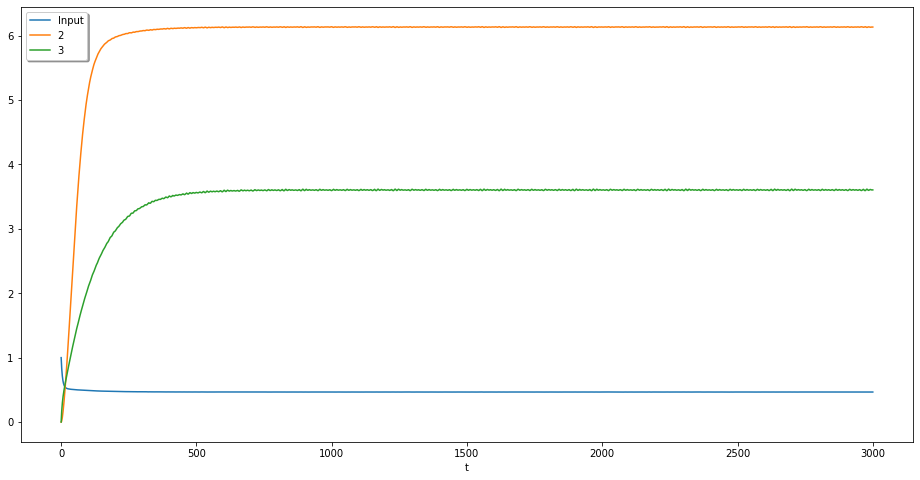

In [34]:
plt.figure(figsize = (16, 8))
t = np.linspace(0, nlen, 20*nlen)
z_full = sol_full.sol(t)
plt.plot(t, z_full[:3].T)
plt.xlabel('t')
plt.legend(['Input','2', '3'], shadow=True)
plt.show()

# seesaw_network(0,start,my_network)